# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Памятка-по-методу-градиентного-спуска" data-toc-modified-id="Памятка-по-методу-градиентного-спуска-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Памятка по методу градиентного спуска</a></div><div class="lev2 toc-item"><a href="#Описание-задачи-линейной-регрессии" data-toc-modified-id="Описание-задачи-линейной-регрессии-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание задачи линейной регрессии</a></div><div class="lev2 toc-item"><a href="#Описание-метода-градиентного-спуска" data-toc-modified-id="Описание-метода-градиентного-спуска-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание метода градиентного спуска</a></div><div class="lev2 toc-item"><a href="#Пошаговое-описание-программной-реализации" data-toc-modified-id="Пошаговое-описание-программной-реализации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Пошаговое описание программной реализации</a></div><div class="lev2 toc-item"><a href="#Задание" data-toc-modified-id="Задание-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Задание</a></div><div class="lev1 toc-item"><a href="#Градиентный-спуск-с-батч-оптимизацией" data-toc-modified-id="Градиентный-спуск-с-батч-оптимизацией-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Градиентный спуск с батч-оптимизацией</a></div><div class="lev2 toc-item"><a href="#Задание" data-toc-modified-id="Задание-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задание</a></div><div class="lev1 toc-item"><a href="#Задание-(на-дом,-если-не-успеете)" data-toc-modified-id="Задание-(на-дом,-если-не-успеете)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание (на дом, если не успеете)</a></div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#from tqdm import tqdm_notebook

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

# Памятка по методу градиентного спуска

## Описание задачи линейной регрессии

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

## Описание метода градиентного спуска

Пусть нам известнен 1 признак объекта и мы включаем свободный член у ровнение регрессии.

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

## Пошаговое описание программной реализации

Для начала нам понадобятся данные. 

Используем те же данные про грузовики, что и были даны на втором семинаре. Нам дано два столбца значений — количество жителей в городе и доход грузовика с уличной едой в этом городе.

Будем строить модель, описывающую зависимость дохода от размера населения.

In [1]:
!head ./data/food_trucks.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166


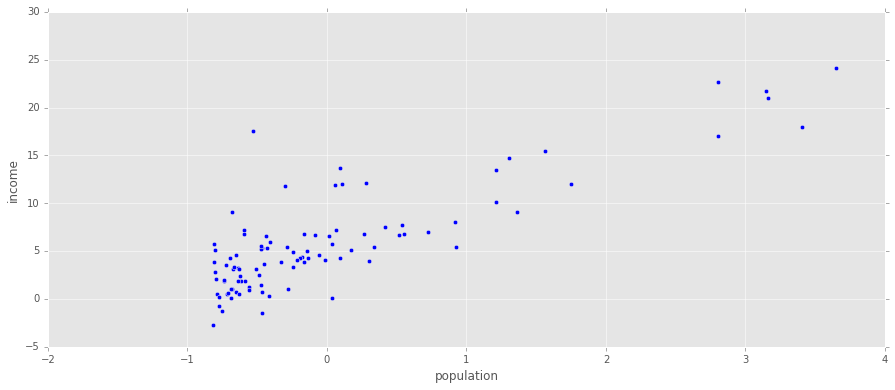

In [16]:
filepath = os.path.join('data', 'food_trucks.txt')
data = np.loadtxt(filepath, delimiter=',')
plt.scatter(data[:,0], data[:, 1])
plt.xlabel('population')
plt.ylabel('income')

In [22]:
# Тогда X - это будет матрица размера ( 97x2 ), a y - вектор-столбец

data[:, 0] = (data[:, 0] - data[:, 0].mean())/data[:, 0].std()
X = np.c_[data[:, 0], np.ones((data.shape[0], 1))]

y = data[:, 1]

Теперь научимся считать ошибку модели. Для этого нам нужны коэффициенты. 
Пока возьмем некоторые случайные значения

In [19]:
Beta = np.array([5,6])

Как было показано выше: 
$$ \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots \quad \Leftrightarrow \quad \hat{y} = X\beta \quad \Leftrightarrow \quad \texttt{y_hat = X.dot(Beta)} $$

Соответственно, ошибка это $(X\beta - y)$, а функция потерь $ L(\beta) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2 $

Отлично, мы научились считать ошибку при заданных $\beta$. Теперь выразим градиент:

$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y) \quad \Leftrightarrow \quad  \texttt{grad = X.T.dot(error)} $$

Теперь к шагам алгоритма:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

In [24]:
def gradient_descent(X, y, iters, alpha):
    n = y.shape[0] 
    Beta = np.random.rand(2)
    for i in xrange(iters):
        y_hat = X.dot(Beta)
        
        # считаем ошибку и значение функции потерь
        #...
        
        # считаем градиент
        #...

        # обновляем коэффициенты
        # ...
    return Beta

In [25]:
Beta = gradient_descent(X, y, 1000, 0.05)

Изобразим функцию потерь

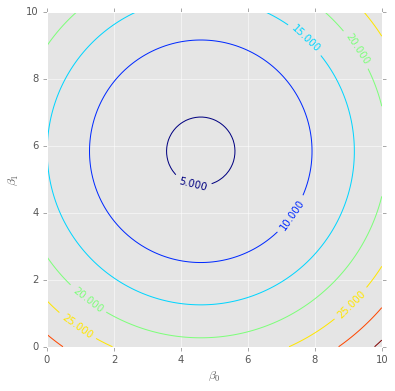

In [54]:
# Возьмем значения для коэффициентов на интервале от 0 до 10
beta0, beta1 = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
BetaArr = np.r_[beta0.reshape(1,-1), beta1.reshape(1,-1)]

# Посчитаем ошибку от всевозможных паросочетаний
y_hat = X.dot(BetaArr)
error = y_hat - y.reshape(-1,1)
cost = np.sum(error ** 2, 0) / (2 * n)
cost = cost.reshape(beta0.shape)

plt.figure(figsize=(6,6))
contour = plt.contour(beta0, beta1, cost)
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('$\\beta_0$')
plt.ylabel('$\\beta_1$')

## Задание

* Добавьте правило останова, срабатывающее при слабом изменении функции потерь
* Измените функцию градиентного спуска так, чтобы темп обучения мог меняться динамически 
* Дополните функцию, чтобы она так же выводила значения коэффициентов и функции потерь на некоторых итерациях. Выведите "прогресс" спуска на график выше


# Градиентный спуск с батч-оптимизацией

Теперь рассмотрим случай, когда данных в выборке много. 

В таких случаях используется стохастическая или батч-оптимизация. Первая состоит в том, что на каждом шаге итерации берется один объект, вторая — в том, что берется некоторое небольшое фиксированное количество объектов.

Загрузите данные из файла space_ga.csv и нормализуйте их. Мы будем предсказывать первый столбец по шести остальным. Эти данные получены с выборов в США в 1980 году. Подробнее о столбцах можно прочитать [тут](http://mldata.org/repository/data/viewslug/statlib-20050214-space_ga/)

Как вы могли заметить, датасет больше предыдущего. На нём мы попробуем батч-оптимизацию.

## Задание
Измените функцию для градиентного спуска так, чтобы на вход она принимала дополнительный параметр — размер батча. Для простоты проверки рекомендуется изменять копию функции, реализованной выше, с измененным именем. Прокомментируйте результаты.

**Замечания**<br/>
* Объекты нужно сначала перемешать, а затем разделить на батчи
* Для разделения на батчи можно использовать функцию np.array_split()
* Учитите, что ошибка (и, соответственно, градиент) считается об объектам попавшим в батч, а значение функции потерь - по всем объектам.

# Задание (на дом, если не успеете)



Сейчас мы сделаем ровно тоже самое, но для логистической регресии.

Рассмотрим принадлежность к классу $y=\pm1$ некого объекта $x$: $p(y=\pm1 | x,\beta)$ и выразим её через **сигмойду** от **отступа**:
$$p(y=\pm1|x,\beta) = \sigma(y \langle \beta, x \rangle), $$
где 
$$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$

А ошибка, которую мы будем минимизировать - логарифмическая:

$$L(\beta) = -\frac{1}{N}\sum_i \log(\sigma(y^{(i)} \langle \beta, x^{(i)} \rangle)) \rightarrow \min_\beta$$

Соответственно, вам нужно:
* Вычислить градиент $L(\beta)$ по $\beta$
* Модифицировать функцию градиентного спуска, чтобы он работал с логарифмической функцией потерь

Примените функцию к данным [по успешности забивания голов в NFL](http://www.stat.ufl.edu/~winner/data/fieldgoal.dat). Описание вы найдете [здесь](http://www.stat.ufl.edu/~winner/data/fieldgoal.txt).
В уравнение регрессии включайте только расстояние до ворот (первый столбец) и свободный член.